In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [ ]:
data=pd.read_excel("pressure_weight.xls")
data.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       30 non-null     float64
 1   Y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
z=np.abs(stats.zscore(data))
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


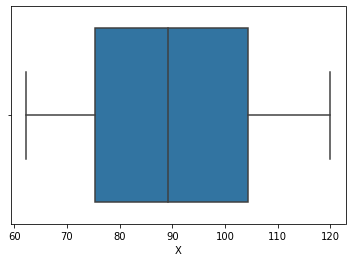

In [ ]:
sns.boxplot(x=data['X'])

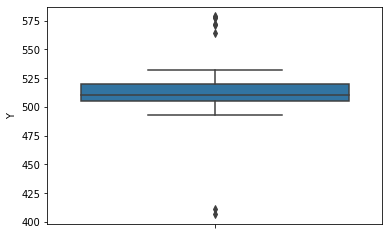

In [ ]:
sns.boxplot(y=data['Y'])

In [ ]:
f_data=data[(z<3).all(axis=1)]
f_data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [ ]:
print(len(data))
print(len(f_data))
if(len(data)==len(f_data)):
  print('No outliers')

30
30
No outliers


**Normalisation**

In [ ]:
data_n=data.copy()
data_n=(data_n-data_n.min())/(data_n.max()-data_n.min())
data_n.head()

,X,Y
0,0.223183,0.995346
1,0.209343,0.990692
2,0.458478,0.955207
3,0.906574,1.000000
4,0.628028,0.963933


**Split Data**

In [ ]:
train_data,test_data=train_test_split(data_n,test_size=0.1)

In [ ]:
print(len(train_data))
train_data.head()

27


,X,Y
3,0.906574,1.000000
19,0.747405,0.606166
10,0.200692,0.521815
13,0.532872,0.602094
16,0.069204,0.579407


**Train Data**

In [ ]:
x=np.array(train_data['X'])
y=np.array(train_data['Y'])

In [ ]:
m=1
c=-1
epochs=100 # epochs
l=0.1      # learning rate
err=[]
ns=len(x)
for i in range(epochs):
  er=0
  m_d=0
  c_d=0
  for j in range(len(x)):
    er+=((y[j]-(m*x[j])-c))**2
    m_d=m_d+((-1.0)*((y[j]-m*x[j]-c)*x[j]))
    c_d=c_d+((-1.0)*(y[j]-m*x[j]-c))
  m_d=m_d/ns
  c_d=c_d/ns
  d_m=-l*m_d
  d_c=-l*c_d
  m=m+d_m
  c=c+d_c
  er=(1/(2*len(train_data['X'])))*(er)
  err.append(er)
print("The local minimum occurs at m =%.2f"%(m),", c = %.2f"%(c))
print(err)

The local minimum occurs at m =0.68 , c = 0.27
[0.7311625089507116, 0.5895755130464059, 0.4807013202159473, 0.39691717792228365, 0.3323774287376843, 0.2825992047431138, 0.24414471179237376, 0.21437758499127152, 0.19127604666749592, 0.17328962408164017, 0.1592292715017704, 0.1481831088559491, 0.139451804796364, 0.13249902434033087, 0.12691342898135072, 0.12237953596466761, 0.11865537133035346, 0.1155553328469377, 0.11293704821857664, 0.11069129712065125, 0.10873428277279237, 0.10700170528583404, 0.10544421672301221, 0.10402393574708517, 0.10271177482501159, 0.10148539055321655, 0.10032761183120088, 0.09922523447955003, 0.09816809687075524, 0.09714837105850276, 0.09616001916488952, 0.09519837649794104, 0.09425983185401131, 0.09334158234776929, 0.0924414453947224, 0.091557714521992, 0.09068904878943326, 0.08983438798536329, 0.08899288758795683, 0.08816386888427453, 0.08734678071318895, 0.08654117012231795, 0.08574665986084709, 0.08496293111460974, 0.08418971026132564, 0.08342675870881439,

**RMSE for Training data**

In [ ]:
train_data_pred=m*train_data['X']+c

In [ ]:
yp=[]
for i in range(len(x)):
  p=(m*x[i])+c
  yp.append(p)
print("Predicted values (yp) : ",yp)

Predicted values (yp) :  [0.8844584761804481, 0.7759331997680823, 0.4031724677429988, 0.6296600011253279, 0.3135211524458269, 0.2663362496578417, 0.3076230395973288, 0.43148340941579, 0.7948071608832763, 0.7051558455861044, 0.41850756114909393, 0.4031724677429988, 0.6886411296103094, 0.6945392424588076, 0.7275686744103973, 0.498721895888669, 0.5789362306282438, 0.8278365928348659, 0.5777566080585441, 0.45153699310068374, 0.40435209031269853, 0.8537882893682578, 0.8986139470168437, 0.42794454170669116, 0.5895528337555405, 0.8868177213198474, 0.52703283756146]


In [ ]:
sum=0
for i in range(len(x)):
  sum+=(y[i]-yp[i])**2
  mse=sum/len(x)
print("Mean Square Error (MSE) : ",mse)

Mean Square Error (MSE) :  0.10725707364921695


Text(0.5, 1.0, 'Predicted data vs Actual data')

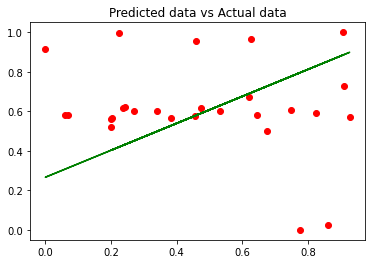

In [ ]:
plt.plot(np.array(train_data['X']),np.array(train_data_pred),'green')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),color='red')
plt.title("Predicted data vs Actual data")

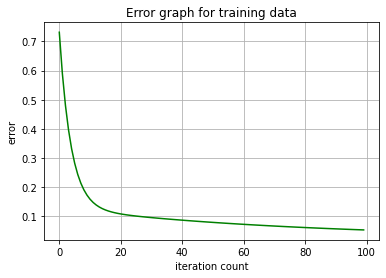

In [ ]:
iters=np.arange(epochs)
plt.plot(iters,err,'green')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

**Test data**

In [ ]:
tx=np.array(test_data['X'])
ty=np.array(test_data['Y'])
test_data_pred=m*test_data['X']+c
print(test_data_pred)

1     0.409071
24    0.948158
9     0.600169
Name: X, dtype: float64


In [ ]:
yp1=[]
for i in range(len(tx)):
  p1=(m*tx[i])+c
  yp1.append(p1)
print("Predicted values (yp) : ",yp1)

Predicted values (yp) :  [0.4090705805914969, 0.9481580949442283, 0.6001694368828372]


In [ ]:
sum=0
for i in range(len(tx)):
  sum+=(ty[i]-yp1[i])**2
  mse1=sum/len(tx)
print("Mean Square Error (MSE) : ",mse1)

Mean Square Error (MSE) :  0.15196661657402902


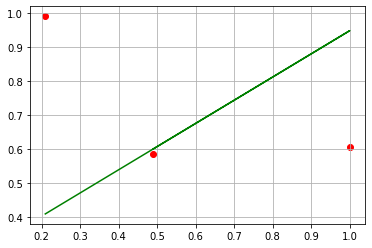

In [ ]:
plt.scatter(test_data['X'],test_data['Y'],color='red')
plt.plot(test_data['X'],test_data_pred,'green')
plt.grid()

In [ ]:
x_min=data['X'].min()
x_max=data['X'].max()
y_min=data['Y'].min()
y_max=data['Y'].max()

**Predict Output**

In [ ]:
x2=float(input("Enter pressure of liquid nitrogen value : "))
xi=(x2-x_min)/(x_max-x_min)
yi=m*xi+c
yi=yi*(y_max-y_min)+y_min
print("Weight of liquid nitrogen based on its pressure {} is : {}".format(x2,yi))

Enter pressure of liquid nitrogen value : 88.7
Weight of liquid nitrogen based on its pressure 88.7 is : 506.21913804499513
